In [1]:
import hcase
import pandas as pd
import numpy as np

import rdkit
from rdkit import Chem


import math 

import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Config section



#fname_reference_scaffolds = '../data/STD_ML_ChEMBL23_NatProd_10132017.txt'
#fname_structures_drugs = '../data/STD_drugbank_approved_structures_v5.txt'
#fname_structures_canvass = '../data/STD_FINAL_20170525_ML_CANVASS_deduplicated.txt'



#fname_out_space = '../data/natprod_hc_space.tab'
fname_embedding_canvass = '../data/canvass_emb_hcase_natprod_bms_dim_2.tab'
fname_embedding_drugs = '../data/drugs_emb_hcase_natprod_bms_dim_2.tab'

fnameout = '../plots/aggregated_hm/aggregated_hm.png'

#n_dim = 2



#use_precomputed_reference_space = False





In [3]:
# Import datasets

df_embedding_canvass = pd.read_csv (fname_embedding_canvass, sep = '\t')
df_embedding_drugs = pd.read_csv (fname_embedding_drugs, sep = '\t')


print (df_embedding_canvass.shape)
print (df_embedding_drugs.shape)

print (df_embedding_canvass.head)
print (df_embedding_drugs.head)



(1216, 11)
(5896, 11)
<bound method NDFrame.head of                    id                                          structure  \
0     NCGC00488574-01                        CN1C=NC2C1C(=O)N(C)C(=O)N2C   
1     NCGC00488516-01  C[C@]1(CCC(=O)NC2=C(O)C(=CC=C2O)C(O)=O)C3CC4C(...   
2     NCGC00488517-01  C[C@]1(CCC(=O)NC2=C(O)C(=CC=C2O)C(O)=O)C3CC4CC...   
3     NCGC00488521-01  CC(CCC1CCC(C)(C2CCC(=C)C[C@]12C)C(O)=O)=CC(=O)...   
4     NCGC00488622-01  C[C@]1(CCC(=O)NC2=C(O)C(=CC=C2OC3OC(CO)C(O)C(O...   
...               ...                                                ...   
1211  NCGC00488621-01  CC(C)[C@]12CC[C@@]3(C)C(C)CCC(O)[C@@]3(CC1)C4=...   
1212  NCGC00380835-02  COC1=C(C)C2=C(OC3=C(Cl)C(=C(Cl)C(=C3C(=O)O2)C)...   
1213  NCGC00488476-01     CCCCCCCC(CC=CCCC(=O)NCCC1=C[NH]C2=C1C=CC=C2)OC   
1214  NCGC00179084-04  CC(=O)OC1CC[C@@]2(C)C(CC[C@]3(C)C2CC=C4C5CC(C)...   
1215  NCGC00488589-01  CC1CCC(O)[C@@]2(CCC=C(C)C)C3=CC4=C([NH]C5=C4C=...   

                                   

In [4]:
# Functions

def binarize (val):
    if val > 0:
        return (1)
    
    return (0)


def panel_plot_multi (subfig, df, subfig_label):
    #subfig = sns.heatmap(df_pivot, annot = False, cmap='Blues')
    
    print (df)
    #df = df[['Dim_1', 'Dim_2']].copy()
    
    #np_data = df.to_numpy()
    
    hm = sns.heatmap(df, annot = False, fmt = ".2f", cmap="Blues", square = True, ax = subfig, cbar_kws={'shrink': 0.6})
    

    subfig.invert_yaxis()
    subfig.set_title (subfig_label, fontsize=24)
    subfig.set_xlabel ('Dim 1', fontsize=32)
    subfig.set_ylabel ('Dim 2', fontsize=32)
    
    

    
 

In [5]:
# Clean-up datasets

df_embedding_canvass = df_embedding_canvass[df_embedding_canvass['hc_order'] == 5].copy()
df_embedding_drugs = df_embedding_drugs[df_embedding_drugs['hc_order'] == 5].copy()



In [6]:
# Workflow: Aggregate how many compounds are in certain sections of the HCASE space (each section can 
# be associated with a bin, which contains a single or more scaffolds, depending on the bin size/number)

df = df_embedding_drugs.copy()



df_agg = df.groupby(['Dim_1', 'Dim_2'], as_index = False).agg({'id': 'count'})




#df_agg['log_n'] = df_agg.apply(lambda x: math.log10(x['id']), axis = 1)

df_agg['bin'] = df_agg.apply (lambda x: binarize(x['id']), axis = 1)


# Note that Dim_1 and Dim_2 seem to be reversed in the next line, the reason is to get a heatmap which better reflect the oritnation of HCASE embedding plots. -- GZK

df_pivot = df_agg.pivot(index='Dim_2', columns='Dim_1', values='id')
df_pivot = df_pivot.reset_index(drop = True)
df_pivot = df_pivot.fillna(0)


df_pivot_bin = df_agg.pivot(index='Dim_2', columns='Dim_1', values='bin')
df_pivot_bin = df_pivot_bin.reset_index(drop = True)
df_pivot_bin = df_pivot_bin.fillna(0)


df_drugs_agg = df_pivot.copy()
df_drugs_agg_bin = df_pivot_bin.copy()
#df_drugs_agg = df_agg



df = df_embedding_canvass.copy()



df_agg = df.groupby(['Dim_1', 'Dim_2'], as_index = False).agg({'id': 'count'})

#df_agg['log_n'] = df_agg.apply(lambda x: math.log10(x['id']), axis = 1)

df_agg['bin'] = df_agg.apply (lambda x: binarize(x['id']), axis = 1)




# Note that Dim_1 and Dim_2 seem to be reversed in the next line, the reason is to get a heatmap which better reflect the oritnation of HCASE embedding plots. -- GZK
df_pivot = df_agg.pivot(index='Dim_2', columns='Dim_1', values='id')
df_pivot = df_pivot.reset_index(drop = True)
df_pivot = df_pivot.fillna(0)

df_pivot_bin = df_agg.pivot(index='Dim_2', columns='Dim_1', values='bin')
df_pivot_bin = df_pivot_bin.reset_index(drop = True)
df_pivot_bin = df_pivot_bin.fillna(0)



df_canvass_agg_bin = df_pivot_bin.copy()
df_canvass_agg = df_pivot.copy()

#df_canvass_agg = df_agg



Dim_1   0     1     2     3    4     5     6     7     8     9   ...    22  \
0      0.0   0.0  32.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0  0.0   0.0   0.0  11.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   1.0  ...   8.0   
4      0.0   0.0   0.0   0.0  3.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
5      0.0   1.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
6      0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
7      0.0   0.0   0.0   0.0  0.0   0.0   0.0   0.0   0.0   2.0  ...   0.0   
8      0.0   0.0   0.0   0.0  0.0  27.0  26.0   0.0   0.0   0.0  ...   0.0   
9      1.0   0.0   1.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...   2.0   
10     0.0   0.0   0.0   0.0  0.0   1.0   0.0   0.0   0.0   0.0  ...   0.0   
11     0.0   0.0   0.0   8.0  0.0   0.0   0.0   0.0   0.0   0.0 

Dim_1   0    1    2    3    4    5    6    7    8    9   ...   22   23   24  \
0      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0   
6      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
7      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  1.0   
8      0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
9      1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
10     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
11     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  

<Figure size 640x480 with 0 Axes>

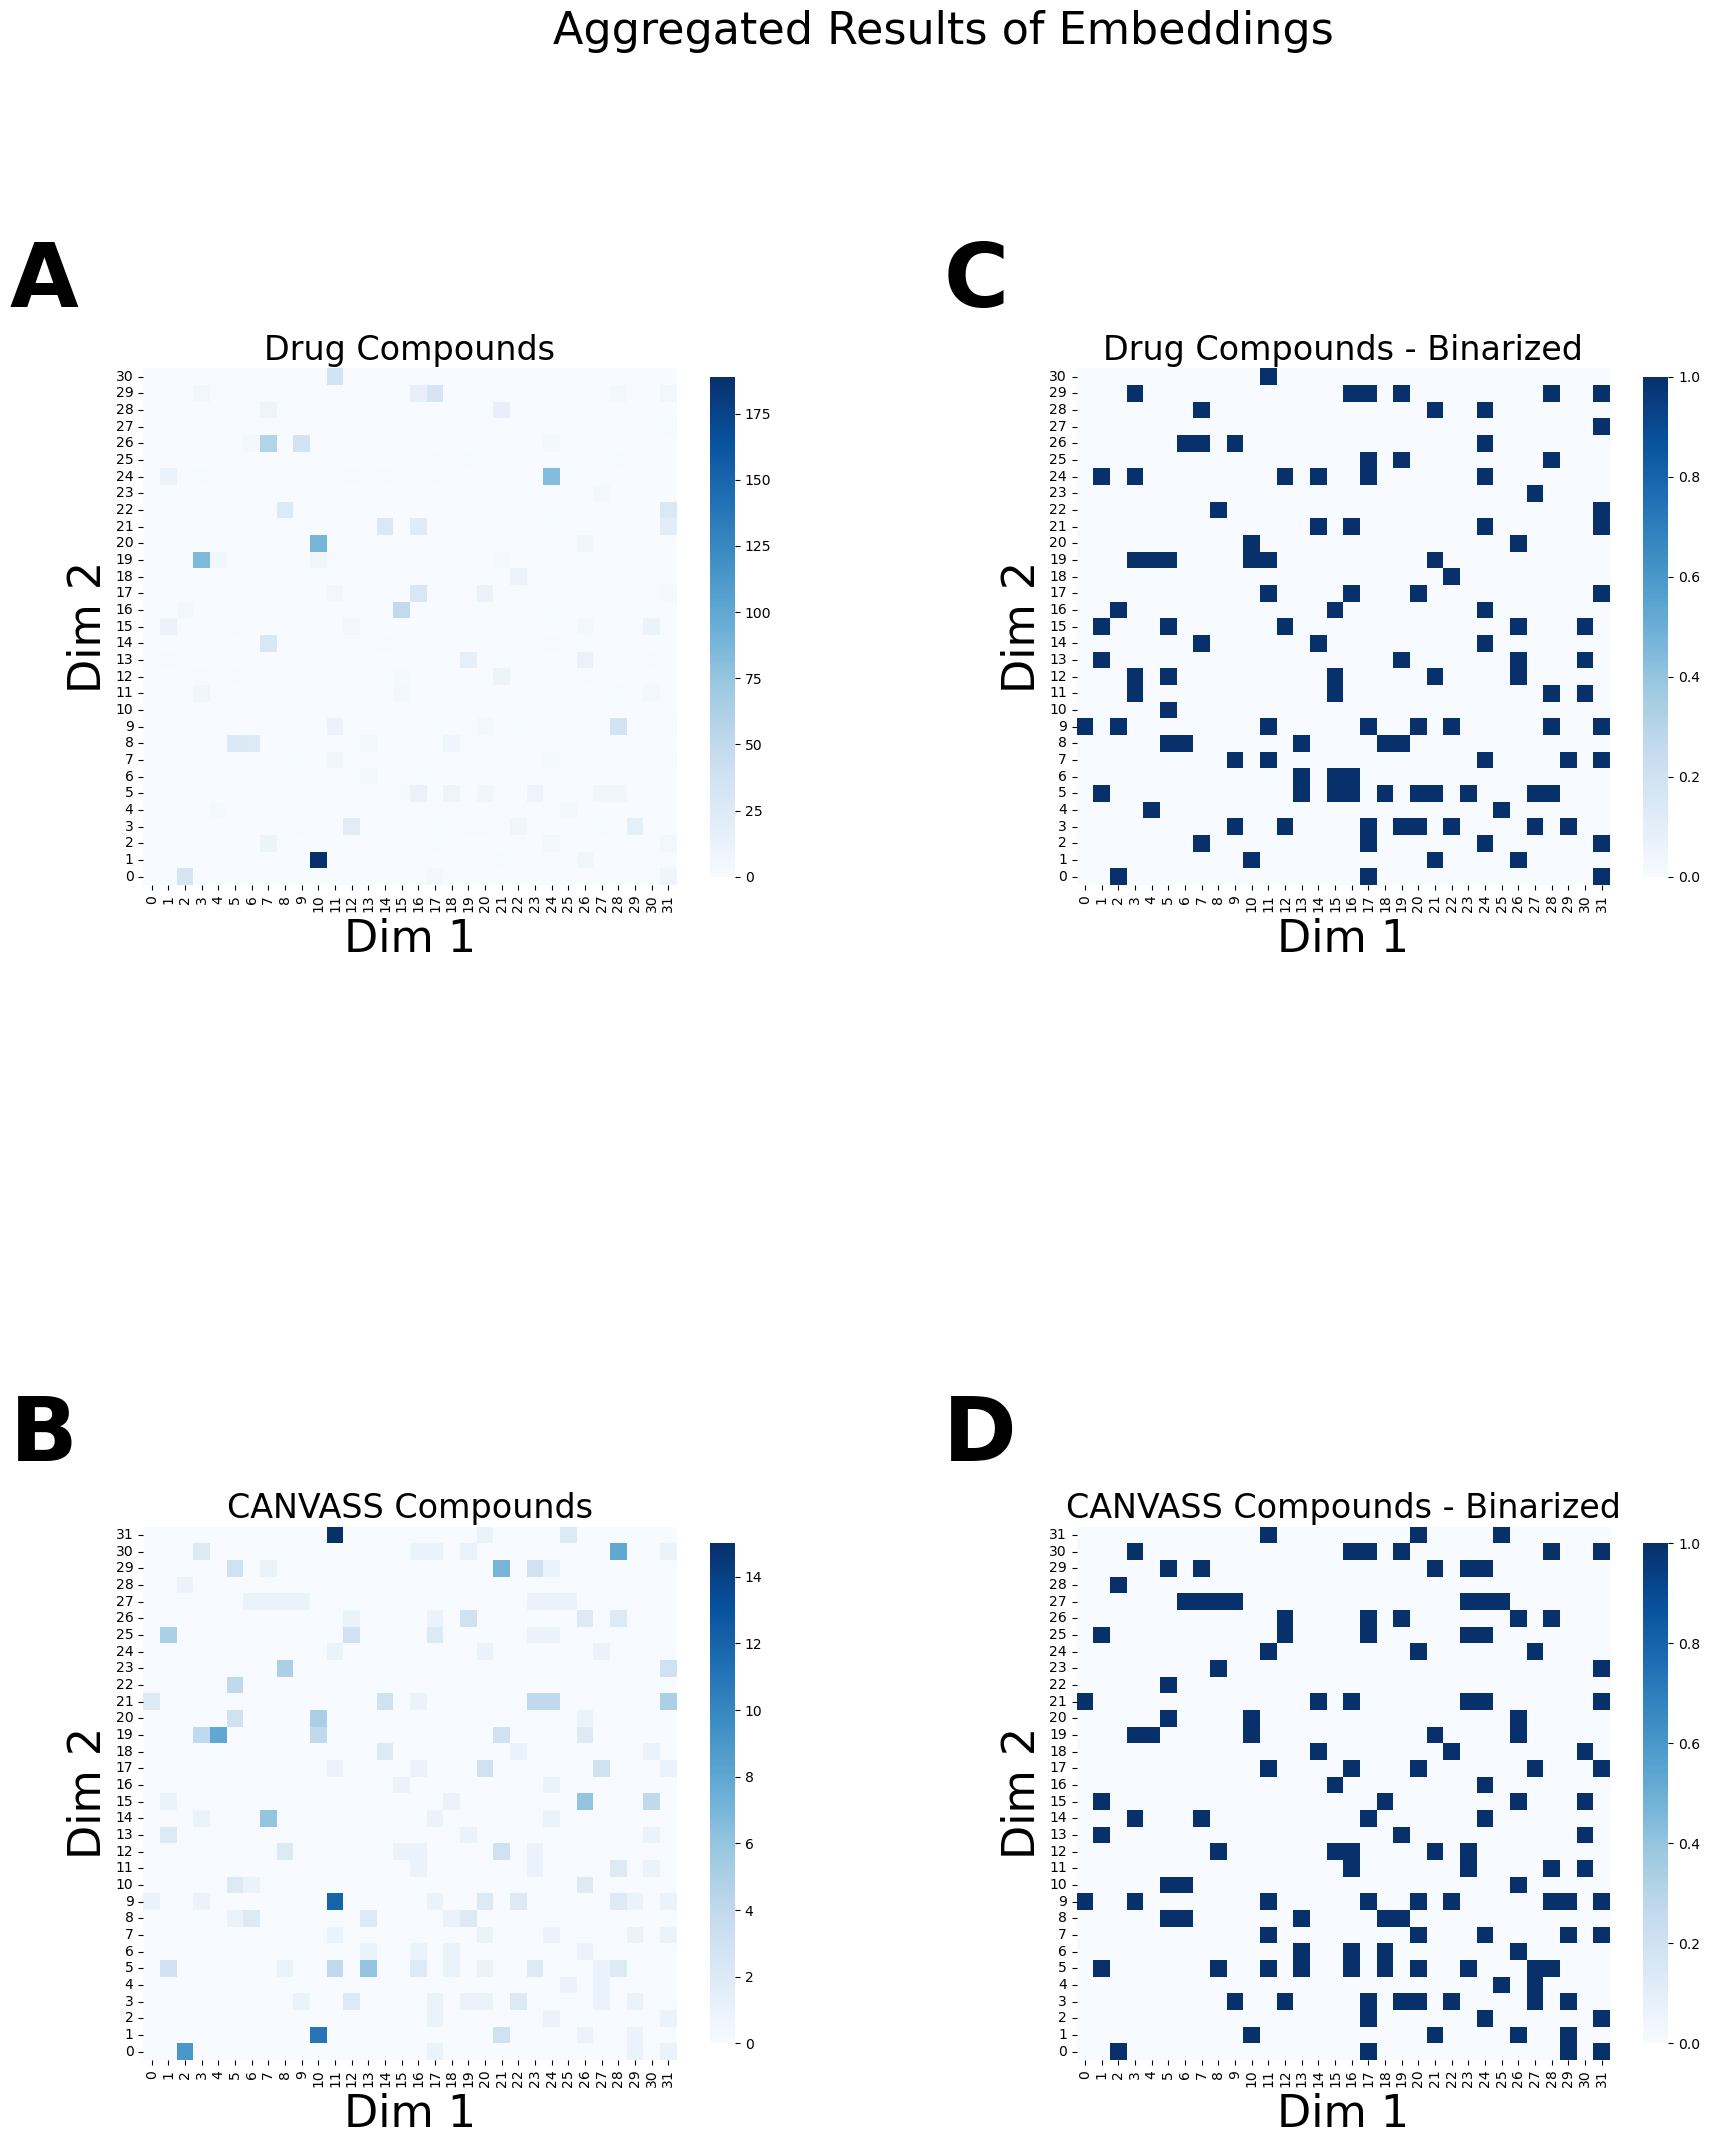

In [7]:
# Plot



fig = plt.figure()

plt.tight_layout()



fig, subfigures = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 25))
#fig, subfigures = plt.subplots(nrows = 4, ncols = 2, sharex = True, sharey = True, figsize = (15, 22))

#print (subfigures[0])

panel_plot_multi (subfigures[0][0], df_drugs_agg, subfig_label = 'Drug Compounds')
panel_plot_multi (subfigures[1][0], df_canvass_agg, subfig_label = 'CANVASS Compounds')
panel_plot_multi (subfigures[0][1], df_drugs_agg_bin, subfig_label = 'Drug Compounds - Binarized')
panel_plot_multi (subfigures[1][1], df_canvass_agg_bin, subfig_label = 'CANVASS Compounds - Binarized')

subfigures[0][0].text(-0.25, 1.25, "A", transform=subfigures[0][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[1][0].text(-0.25, 1.25, "B", transform=subfigures[1][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[0][1].text(-0.25, 1.25, "C", transform=subfigures[0][1].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[1][1].text(-0.25, 1.25, "D", transform=subfigures[1][1].transAxes,
            fontsize=64, fontweight='bold', va='top')



fig.suptitle('Aggregated Results of Embeddings', fontsize = 32)
#fig.supylabel('Dim 2')


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)



#plt.savefig (fname_out_knn_drugs_emb_hcase_chembl, dpi=300)




"""

plt.figure()

ax = sns.heatmap(df_pivot, annot = False, cmap='Blues')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
ax.invert_yaxis()




plt.show()
"""

plt.savefig (fnameout, dpi=600)

plt.show()

In [8]:
# Spot Checking
print (max(list(df_embedding_drugs['hc_order'])))
df_spot = df_embedding_drugs[df_embedding_drugs['hc_order'] == 5].copy()
print (df_spot.shape)
df_spot = df_spot[df_spot['embedded_hs_coordinates'] == '2;0'].copy()
print (df_spot.shape)


df_spot = df_embedding_drugs[df_embedding_drugs['hc_order'] == 5].copy()
df_spot = df_spot[df_spot['embedded_hs_coordinates'] == '11;31'].copy()
#print (df_spot)
print (df_spot.shape)




5
(1474, 11)
(32, 11)
(36, 11)


In [9]:
# References:

# Ref: https://github.com/matplotlib/matplotlib/issues/3466/
# Ref: https://htmlcolorcodes.com/color-picker/
# Ref: https://iwatobipen.wordpress.com/2017/11/03/draw-high-quality-molecular-image-in-rdkit-rdkit/
# Ref: https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
# Ref: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
# Ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html
# Ref: https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers
# Ref: https://matplotlib.org/3.1.1/gallery/shapes_and_collections/scatter.html
# Ref: https://matplotlib.org/3.1.1/tutorials/colors/colors.html
# Ref: https://python-graph-gallery.com/106-seaborn-style-on-matplotlib-plot/
# Ref: https://python-graph-gallery.com/122-multiple-lines-chart/
# Ref: https://python-graph-gallery.com/125-small-multiples-for-line-chart/
# Ref: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/
# Ref: https://seaborn.pydata.org/examples/many_facets.html
# Ref: https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
# Ref: https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size
# Ref: https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python
# Ref: https://stackoverflow.com/questions/31686530/matplotlib-generate-a-new-graph-in-a-new-window-for-subsequent-program-runs/31686783
# Ref: https://stackoverflow.com/questions/39870642/matplotlib-how-to-plot-a-high-resolution-graph
# Ref: https://stackoverflow.com/questions/57568311/matplotlib-scatter-issue-with-python-3-x
# Ref: https://www.nceas.ucsb.edu/~frazier/RSpatialGuides/colorPaletteCheatsheet.pdf
# Ref: https://www.pluralsight.com/guides/choosing-color-palettes
# Ref: https://www.rdkit.org/docs/GettingStartedInPython.html
# Ref: https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html
# Ref: https://www.science-emergence.com/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/
# Ref: https://www.geeksforgeeks.org/how-to-draw-2d-heatmap-using-matplotlib-in-python/
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html
# Ref: ChatGPT 3.5 for plotting